In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
filename="/content/drive/MyDrive/Master_RomanFile_Balanced.xlsx"
df = pd.read_excel(filename)
print(df.columns.tolist())

['Unnamed: 0.1', 'Unnamed: 0', 'text', 'label']


In [ ]:
total_rows = len(df)
print("Total rows in the dataset:", total_rows)

Total rows in the dataset: 70256


In [ ]:
print(df)

       Unnamed: 0.1  Unnamed: 0  \
0                 0      229951   
1                 1       32495   
2                 2      153442   
3                 3       69522   
4                 4      183394   
...             ...         ...   
70251         70251        2066   
70252         70252        2909   
70253         70253      114301   
70254         70254      156833   
70255         70255      141690   

                                                    text  label  
0      ['omg', 'im', 'crine', 'this', 'is', 'my', 'mo...      1  
1      ['thinking', 'about', 'higher', 'education', '...      1  
2      ['mery', 'naseeb', 'ki', 'ye', 'b', 'khush', '...      0  
3      ['almost', 'hours', 'nalang', 'im', 'really', ...      1  
4      ['zaman', 'pak', 'sby', 'kok', 'gak', 'terungk...      1  
...                                                  ...    ...  
70251  ['yeh', 'bilkul', 'achotey', 'aur', 'intehai',...      0  
70252  ['janab', 'ibnesafi', 'bilashuba', 'urdu', '

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud

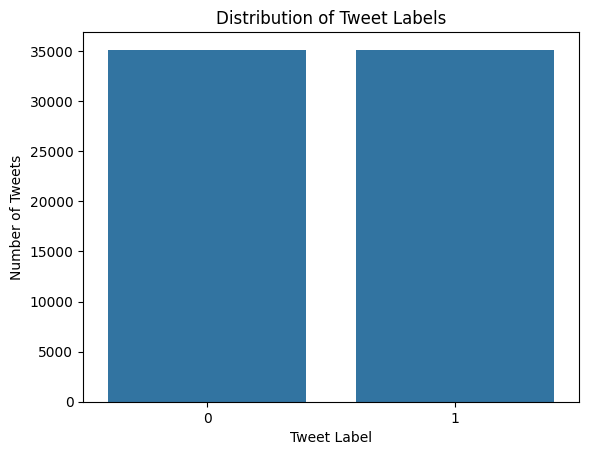

In [ ]:
# Count the number of tweets for each label
label_counts = df['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Tweet Label')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Tweet Labels')
plt.show()


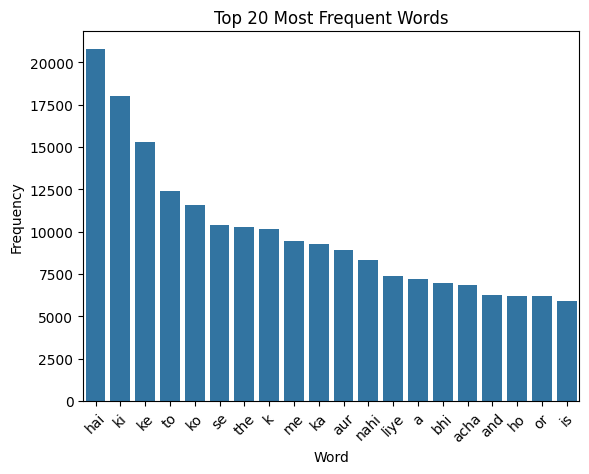

In [6]:
# Create a function to tokenize and clean tweets
import re # Import the 're' module for regular expression operations

def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove extra spaces
    tweet = ' '.join(tweet.split())

    return tweet

# Clean all tweets and store them in a new column
df['clean_tweet'] = df['text'].apply(clean_tweet) # Make sure 'data' is defined, it seems you might have meant to use 'df' here.

# Combine all tweets into a single string
all_words = ' '.join(df['clean_tweet'])

# Create a word frequency dictionary
from collections import Counter
word_counts = Counter(all_words.split())

# Visualize the top 20 most frequent words using a bar plot
top_20_words = word_counts.most_common(20)
sns.barplot(x=[word for word, _ in top_20_words], y=[count for _, count in top_20_words])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

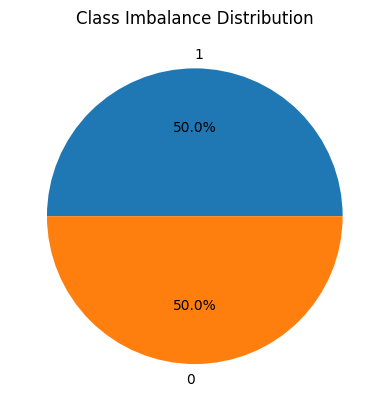

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas dataframe called 'df'
prediction_counts = df['label'].value_counts().sort_values(ascending=False)

plt.pie(prediction_counts.values, labels=prediction_counts.index, autopct="%1.1f%%")
plt.title("Class Imbalance Distribution")
plt.show()


In [7]:


# Create a function to tokenize and clean tweets

def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove extra spaces
    tweet = ' '.join(tweet.split())

    return tweet

# Clean all tweets and store them in a new column
df['clean_tweet'] = df['text'].apply(clean_tweet) # Make sure 'data' is defined, it seems you might have meant to use 'df' here.

# Combine all tweets into a single string
all_words = ' '.join(df['clean_tweet'])

# Create a word frequency dictionary
word_counts = Counter(all_words.split())








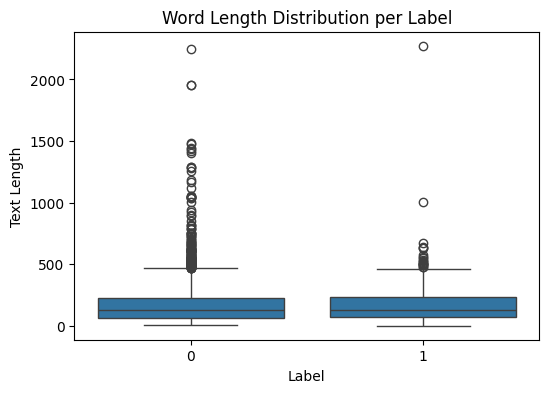

In [ ]:
# # 2. Word Length Distribution per Label (Boxplot)
df['text_length'] = df['text'].apply(len)

# Adjust figure size (smaller)
plt.figure(figsize=(6, 4))

sns.boxplot(x='label', y='text_length', data=df)
plt.title('Word Length Distribution per Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


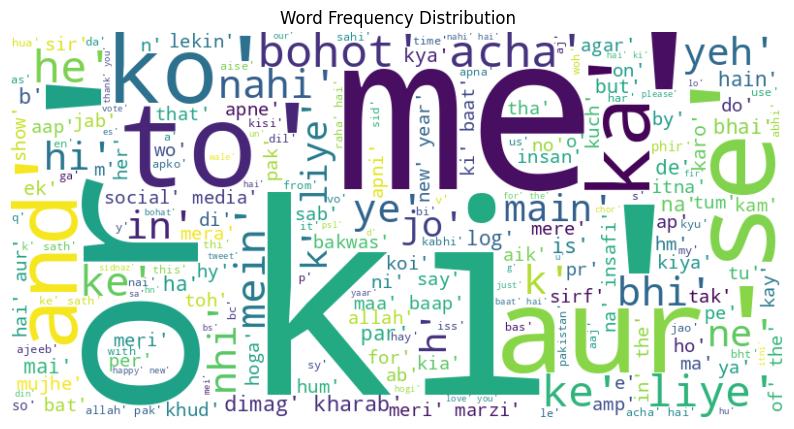

In [ ]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Distribution')
plt.show()

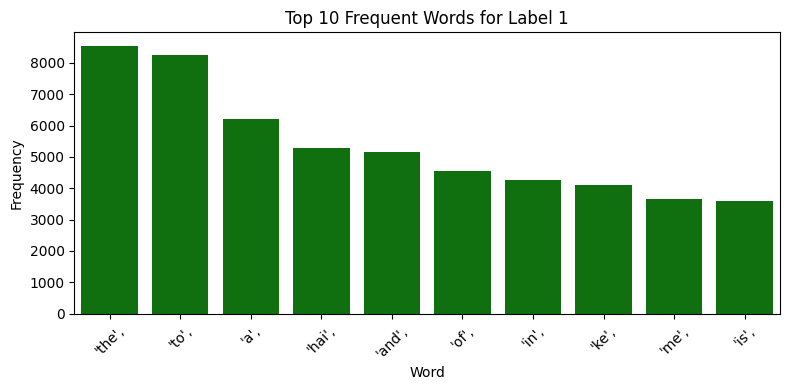

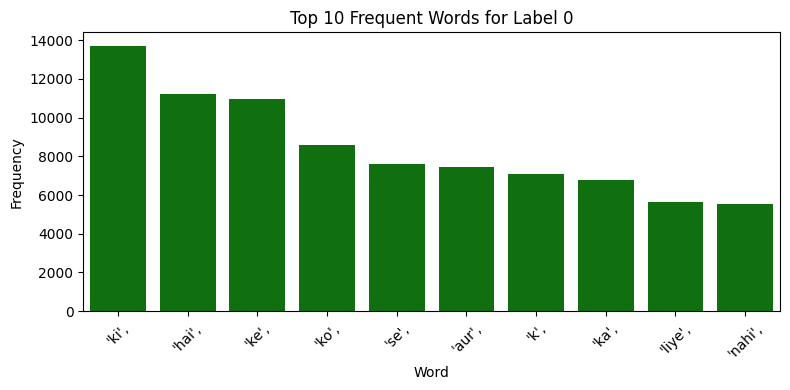

In [8]:
top_n = 10
for label in df['label'].unique():
  subset = df[df['label'] == label]
  word_counts = Counter(' '.join(subset['text']).split())
  top_words = word_counts.most_common(top_n)

  # Adjust figure size (smaller)
  plt.figure(figsize=(8, 4))

  # Green color for the plot
  sns.barplot(x=[word for word, _ in top_words], y=[count for _, count in top_words], color='green')

  plt.title(f'Top {top_n} Frequent Words for Label {label}')
  plt.xlabel('Word')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
